In [3]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

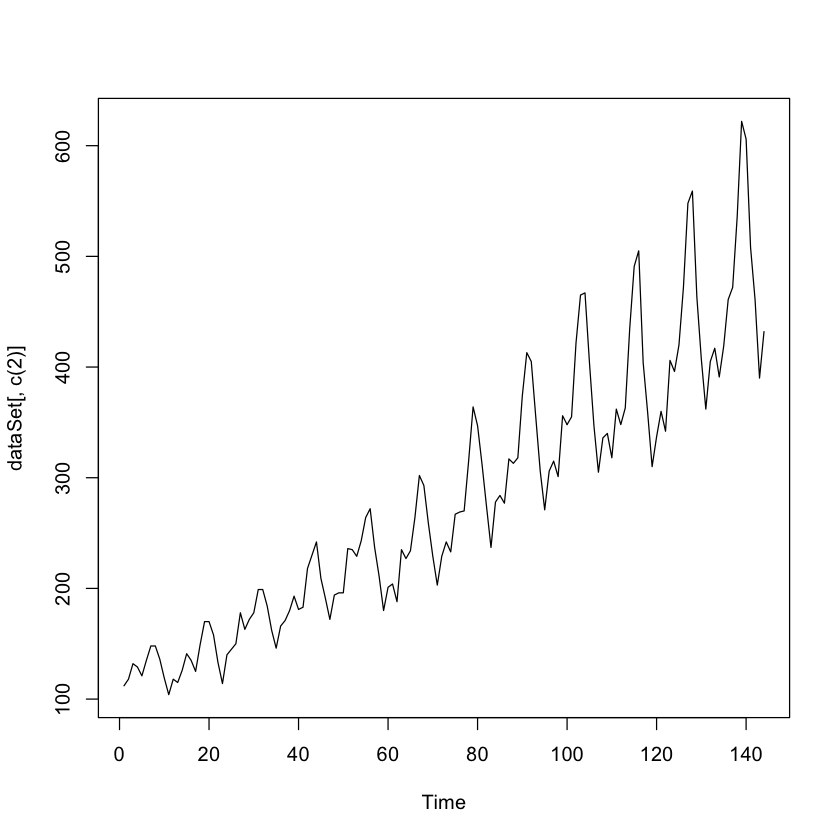

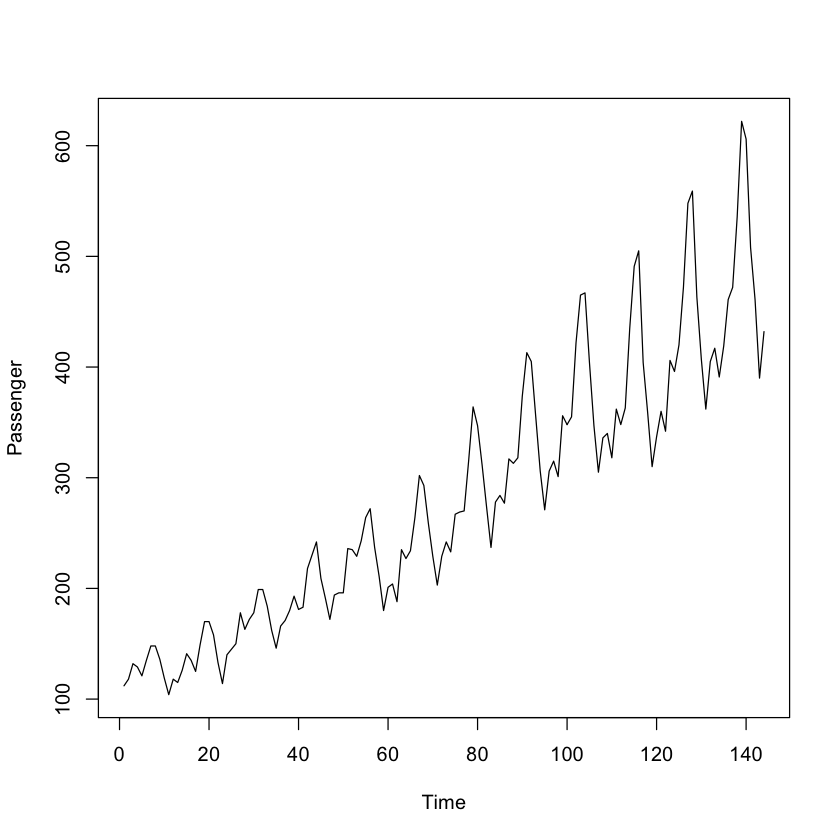

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

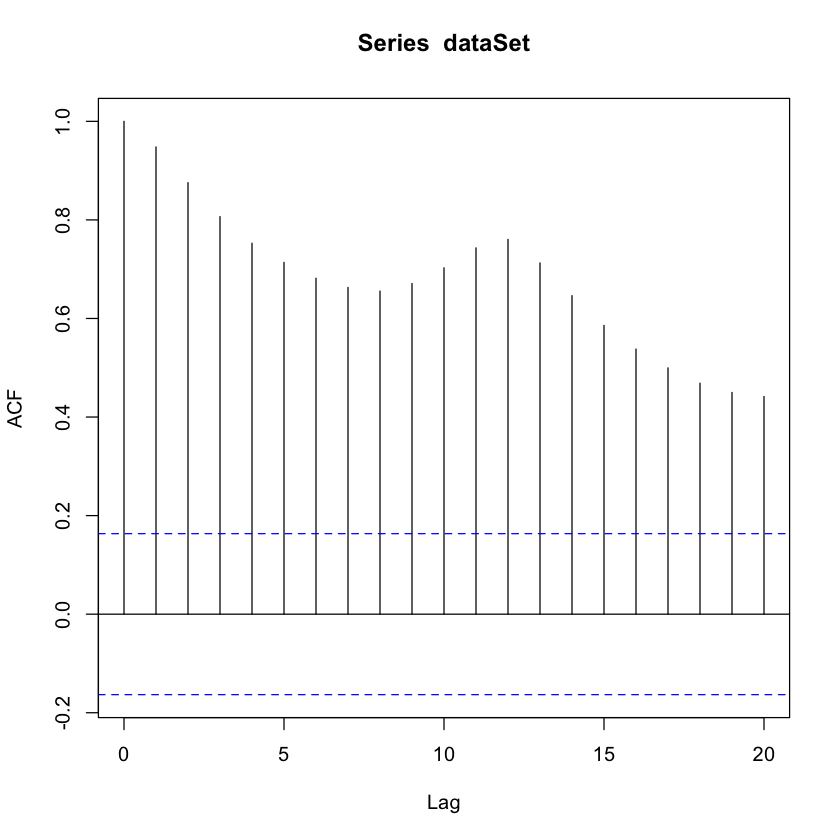

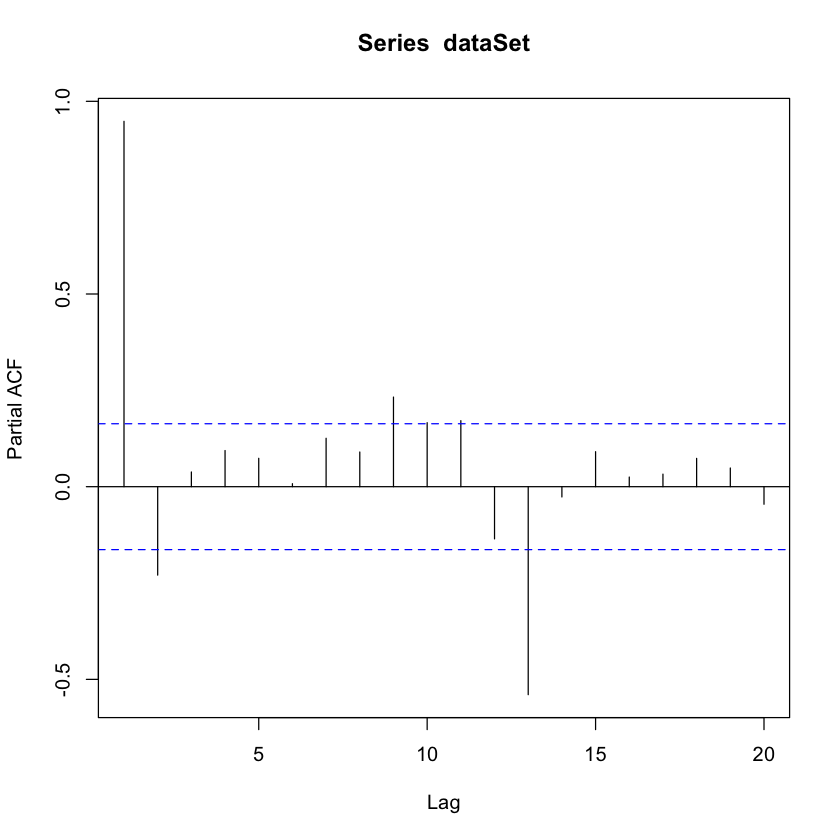

In [7]:
# Finding Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using ACF()
acf(dataSet, lag.max=20)   

# Finding Partial Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using PACF()
pacf(dataSet, lag.max=20)  


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 48.686, df = 8, p-value = 7.302e-08

Model df: 2.   Total lags used: 10

[1] 0.9108003


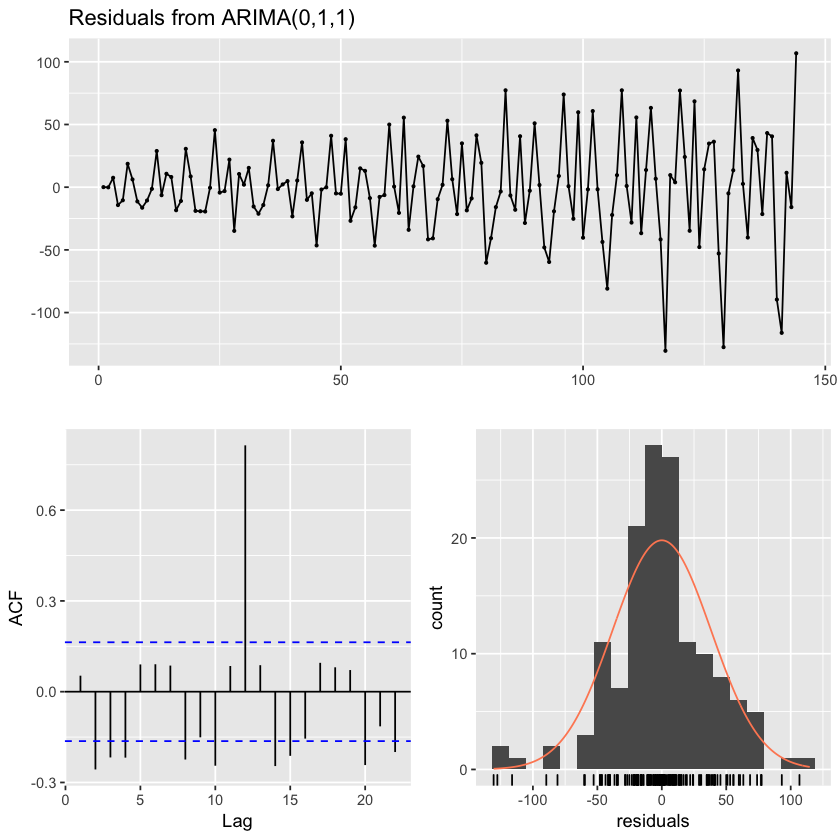

    Point Forecast       Lo 80     Hi 80       Lo 95     Hi 95
145       434.3711   385.17450  483.5677   359.13138  509.6108
146       440.3204   346.07775  534.5631   296.18869  584.4521
147       446.2697   298.96121  593.5782   220.98080  671.5586
148       452.2190   244.78023  659.6578   134.96876  769.4693
149       458.1683   184.25035  732.0863    39.24693  877.0897
150       464.1176   117.91450  810.3208   -65.35436  993.5896
151       470.0669    46.19938  893.9345  -178.18255 1118.3164
152       476.0162   -30.54920  982.5817  -298.70875 1250.7412
153       481.9655  -112.04400 1075.9751  -426.49366 1390.4248
154       487.9148  -198.04163 1173.8713  -561.16506 1536.9948
155       493.8642  -288.33249 1276.0608  -702.40238 1690.1307
156       499.8135  -382.73368 1382.3606  -849.92591 1849.5528
157       505.7628  -481.08376 1492.6093 -1003.48875 2015.0143
158       511.7121  -583.23890 1606.6630 -1162.87093 2186.2951
159       517.6614  -689.06990 1724.3926 -1327.87484 23

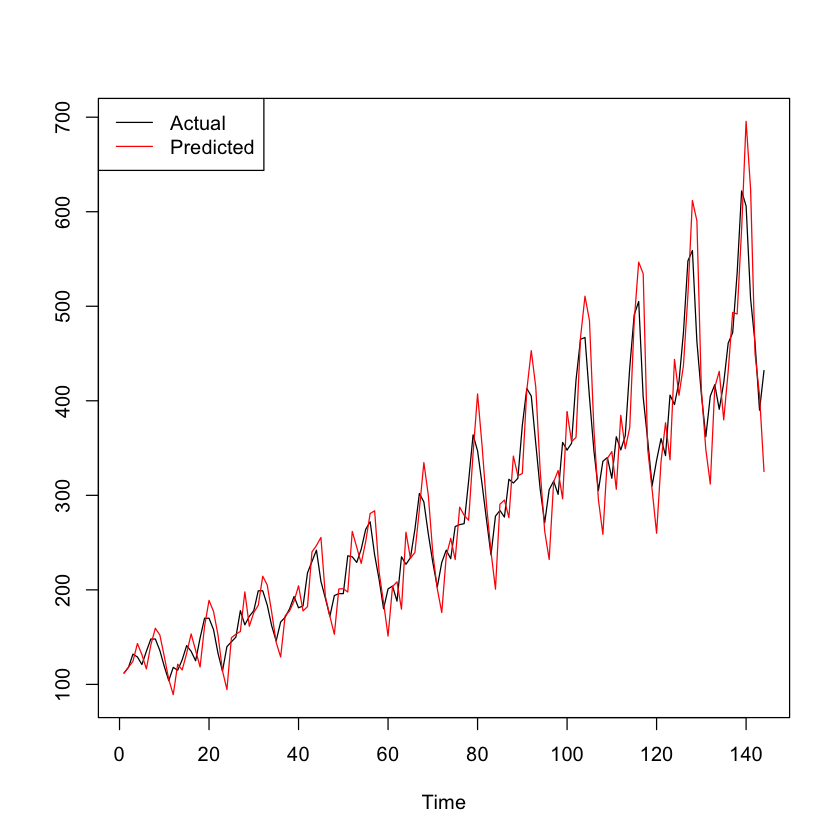

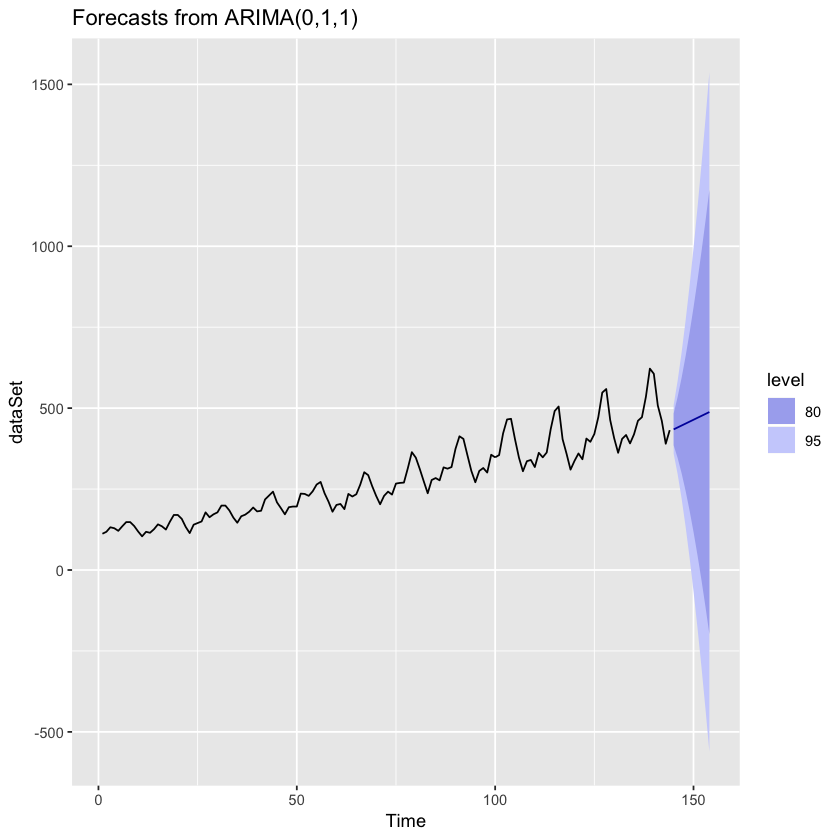

In [8]:
# ARIMA Model with seasonality
fit_arima  <- arima(dataSet,  order = c(0,1,1), seasonal = c(0,1,1)); 
checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))